##  Introducción a la Regresión Lineal

El contenido de esta clase corresponde a la implementación utilizando Python + Numpy para generar regresión lineal simple, y regresión lineal múltiple. La idea es poder entender y traspasar el proceso de una notación matemática, a operaciones de código utilizando numpy. Finalmente, enseñar el uso de librerías y comprobar que nuestras implementaciones *from scratch*, obtienen resultados similares a las implementaciones estándar de las librerías.


### Obtención de los Coeficientes de la Regresión Lineal mediante Mínimos Cuadrados

En la regresión lineal simple, el objetivo es ajustar una línea que minimice la suma de los cuadrados de los residuos (diferencias entre los valores observados y los valores predichos).

La ecuación de la recta de regresión lineal es:

$$ \hat{Y}_i = \beta_0 + \beta_1 X_i $$

Donde:
- $\hat{Y}_i$ es el valor predicho.
- $\beta_0$ es el intercepto.
- $\beta_1$ es el coeficiente de la variable independiente $X_i$.

### Ecuaciones Normales

Para encontrar los valores de $\beta_0$ y $\beta_1$, utilizamos las ecuaciones normales derivadas del método de los mínimos cuadrados. Estas ecuaciones se obtienen al minimizar la suma de los cuadrados de los residuos:

$$ \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

#### Derivadas Parciales

1. **Respecto a $\beta_0$:**

$$ \frac{\partial}{\partial \beta_0} \sum_{i=1}^{n} (Y_i - \beta_0 - \beta_1 X_i)^2 = 0 $$

2. **Respecto a $\beta_1$:**

$$ \frac{\partial}{\partial \beta_1} \sum_{i=1}^{n} (Y_i - \beta_0 - \beta_1 X_i)^2 = 0 $$

#### Resolviendo las Ecuaciones Normales

Al resolver las derivadas parciales, obtenemos las siguientes ecuaciones normales:

$$ \sum_{i=1}^{n} Y_i = n \beta_0 + \beta_1 \sum_{i=1}^{n} X_i $$

$$ \sum_{i=1}^{n} Y_i X_i = \beta_0 \sum_{i=1}^{n} X_i + \beta_1 \sum_{i=1}^{n} X_i^2 $$

#### Solución para $\beta_1$

Despejamos $\beta_1$ de las ecuaciones normales:

$$ \beta_1 = \frac{n \sum_{i=1}^{n} Y_i X_i - \sum_{i=1}^{n} X_i \sum_{i=1}^{n} Y_i}{n \sum_{i=1}^{n} X_i^2 - (\sum_{i=1}^{n} X_i)^2} $$

#### Solución para $\beta_0$

Una vez que tenemos $\beta_1$, podemos encontrar $\beta_0$ utilizando la media de $X$ y $Y$:

$$ \beta_0 = \bar{Y} - \beta_1 \bar{X} $$

Donde $\bar{X}$ y $\bar{Y}$ son las medias de $X$ y $Y$, respectivamente:

$$ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i $$

$$ \bar{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i $$

### Conclusión

Hemos obtenido las fórmulas para los coeficientes $\beta_0$ y $\beta_1$ en una regresión lineal simple utilizando el método de los mínimos cuadrados:

1. $\beta_1 = \frac{n \sum_{i=1}^{n} Y_i X_i - \sum_{i=1}^{n} X_i \sum_{i=1}^{n} Y_i}{n \sum_{i=1}^{n} X_i^2 - (\sum_{i=1}^{n} X_i)^2}$

2. $\beta_0 = \bar{Y} - \beta_1 \bar{X}$

Estas ecuaciones nos permiten calcular los coeficientes de la regresión lineal que mejor se ajustan a los datos observados.

En primer lugar, importamos las librerías:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Para ilustrar el cómo podemos ajustar una regresión lineal simple, vamos a simular datos aleatorios. Vamos a generar una variable independiente `x`, con valores del 1 al 10, y nuestra variable dependiente `y` corresponderá a una combinación de números enteros obtenidos de forma aleatoria entre $[10,20]$, con nuestra variable $x$.

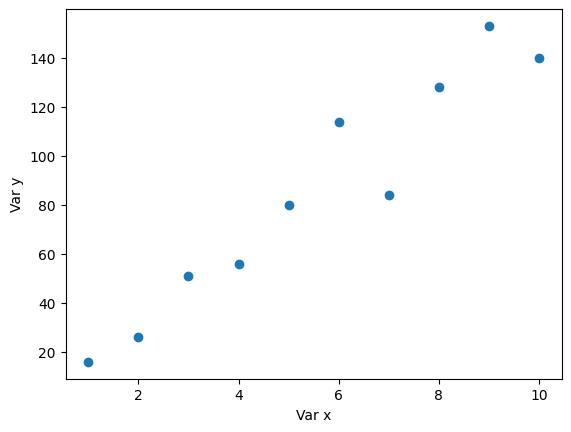

In [2]:
np.random.seed(42) #Fijamos la semilla aleatoria

x = np.arange(1,11) # Generamos 10 numeros desde el 1 al 10
# Generamos 10 numeros aleatorios entre 10 y 20,
# luego lo multiplicamos con nuestra variable x
y = np.random.randint(10, 20, size=10) * x

plt.scatter(x,y) # Grafiquemos como se ven nuestros datos.
plt.xlabel("Var x")
plt.ylabel("Var y")
plt.show()

Recordar

$\beta_1 = \frac{n \sum_{i=1}^{n} Y_i X_i - \sum_{i=1}^{n} X_i \sum_{i=1}^{n} Y_i}{n \sum_{i=1}^{n} X_i^2 - (\sum_{i=1}^{n} X_i)^2}$

$\beta_0 = \bar{Y} - \beta_1 \bar{X}$

In [3]:
n = len(x)
sx = np.sum(x)
sy = np.sum(y)
sxy = np.dot(x, y)
sx2 = np.sum(np.square(x))
b1 = (n*sxy - sx*sy)/(n*sx2-sx**2)
b0 = sy/n - b1*sx/n
print(f'b1: {beta_1:5.2f} \nb0: {b0:5.2f}')

NameError: name 'beta_1' is not defined

### Escribamos los coeficientes de otra forma:

La idea de la regresión lineal es poder modelar la dependencia de las variables independientes, con las variables dependientes. En este caso, nosotros explícitamente hemos generado esta dependencia de $y$ en función de $x$, pero en set de datos de la vida real, esta dependencia puede ser mucho más complicada de modelar. La forma de una regresión lineal simple corresponde a la siguiente ecuación:

$$Y = \beta_1 X + \beta_0 + \epsilon$$

donde $Y$ corresponde a nuestra variable dependiente, $X$ a nuestra variable independiente, $\beta_1$ al coeficiente de regresión el cual modela la relación de la variable $X$ con la variable $Y$, $\beta_0$ corresponde al intercepto, y $\epsilon$ corresponde a una variable que incluye un conjunto grande de factores, cada uno de los cuales influye en la respuesta sólo en
pequeña magnitud, a la que llamaremos error.

En este caso, nosotros podemos aproximar los valores de $Y$, y los parámetros del modelo ($\beta_1$ y $\beta_0$). Por lo mismo, utilizaremos la notación $\hat{Y}, \hat{\beta_1}, \hat{\beta_0}$ para referirnos a estas aproximaciones. Utilizando el **método de los mínimos cuadrados** podemos estimar los valores de los distintos parámetros:


- Primer paso, calcular $\hat{\beta_1}$

$$\hat{\beta_1} = \frac{(\sum x \sum y) - (n\sum xy)}{(\sum x)^2 - n\sum x^2} =\frac{\sum(x - \bar{x})(y - \bar{y})}{\sum(x - \bar{x})^2}$$

- Segundo paso, calcular $\hat{\beta_0}$ en función de $\hat{\beta_1}$

$$\hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n} = \bar{y} - \hat{\beta_1}\bar{x}$$

Vamos a utilizar la segunda parte de las fórmulas, utilizando una combinación de las funciones de suma y de obtener el promedio (`np.sum` y `np.mean`). En este caso vamos a transformar las sumatorias ($\Sigma$) en `np.sum`, los promedios ($\bar{x}$) en `np.mean`, y $n$ en `len(x)`. Cabe destacar que realizar las operaciones del tipo: $x - \bar{x}$, se pueden realizar debido a que $x$ es un vector de numpy, y este permite operaciones entre vectores y escalares.



### Deducción de la fórmula del coeficiente de regresión lineal $\beta_1$

### Ecuación Inicial

La forma inicial de la ecuación es:

$$ \beta_1 = \frac{n \sum xy - \sum x \sum y}{n \sum x^2 - (\sum x)^2} $$

### Forma Final

La forma final de la ecuación es:

$$ \beta_1 = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2} $$

### Paso a Paso

#### 1. Expansión de la suma del numerador

Primero, consideremos el numerador de la forma final:

$$ \sum (x - \bar{x})(y - \bar{y}) $$

Donde $\bar{x}$ y $\bar{y}$ son las medias de $x$ y $y$, respectivamente:

$$ \bar{x} = \frac{\sum x}{n} $$
$$ \bar{y} = \frac{\sum y}{n} $$

Sustituimos estas medias en la expresión:

$$ \sum (x - \bar{x})(y - \bar{y}) = \sum \left(x - \frac{\sum x}{n}\right) \left(y - \frac{\sum y}{n}\right) $$

#### 2. Separación y simplificación

Expandimos el producto en la suma:

$$ \sum \left(x - \frac{\sum x}{n}\right) \left(y - \frac{\sum y}{n}\right) = \sum \left(xy - x \frac{\sum y}{n} - y \frac{\sum x}{n} + \frac{\sum x \sum y}{n^2}\right) $$

Dividimos la suma en cuatro partes:

$$ \sum xy - \sum \left(x \frac{\sum y}{n}\right) - \sum \left(y \frac{\sum x}{n}\right) + \sum \left(\frac{\sum x \sum y}{n^2}\right) $$

#### 3. Simplificación de cada término

Sumamos cada término por separado:

$$ \sum xy - \frac{\sum y \sum x}{n} - \frac{\sum x \sum y}{n} + \frac{(\sum x)(\sum y)}{n} $$

Observamos que los dos términos del medio son iguales y opuestos, por lo que se cancelan:

$$ \sum xy - \frac{\sum x \sum y}{n} - \frac{\sum x \sum y}{n} + \frac{\sum x \sum y}{n} = \sum xy - \frac{\sum x \sum y}{n} $$

#### 4. Forma final del numerador

Finalmente, obtenemos la forma simplificada del numerador:

$$ \sum (x - \bar{x})(y - \bar{y}) = \sum xy - \frac{\sum x \sum y}{n} $$

#### 5. Expansión del denominador

Ahora consideremos el denominador de la forma final:

$$ \sum (x - \bar{x})^2 $$

Sustituimos la media de $x$:

$$ \sum \left(x - \frac{\sum x}{n}\right)^2 $$

Expandimos el cuadrado:

$$ \sum \left(x^2 - 2x \frac{\sum x}{n} + \left(\frac{\sum x}{n}\right)^2\right) $$

Dividimos la suma en tres partes:

$$ \sum x^2 - 2 \sum \left(x \frac{\sum x}{n}\right) + \sum \left(\frac{\sum x}{n}\right)^2 $$

Sumamos cada término por separado:

$$ \sum x^2 - 2 \sum x^2 + \frac{(\sum x)^2}{n} $$

Haciendo la resta y multiplicando por n numerador y denominador se obtiene la formula.

Implementemos la segunda forma, recordar:

$$  \hat{\beta_1} = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2} $$
y
$$ \hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n}$$

- Compruebe que los valores de obtenidos con la primera forma y la segunda forma son iguales
- ¿Qué pasaría con nuestros coeficientes si cambiamos la forma de generar nuestra variable dependiente $Y$? Fije una semilla y reemplace el operador utilizado (en vez de multiplicar por $x$, cambiar por ej: suma)


In [4]:
x_min_mx = x - np.mean(x)  # x minus mean(x)
y_min_my = y - np.mean(y)  # y minus mean(y)

beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
beta_0 = np.mean(y) - (beta_1 * np.mean(x))

print(f'beta_1: {beta_1:5.2f} \nbeta_0: {beta_0:5.2f}')

beta_1: 15.20 
beta_0:  1.20


Con los parámetros $\hat{\beta_1}$ y $\hat{\beta_0}$, podemos generar una función la cual reciba el valor el vector $x$, y realizar la estimación de $\hat{Y}$:

In [5]:
# Llamaremos a esta función, lin_reg(x), recibe el vector y utiliza las variables betas calculadas anteriormente
# Una posible mejora, es que reciba los betas por parámetros de la función
def lin_reg(x):
    y_hat = (beta_1 * x) + beta_0 #Aplicamos la forma de la regresión lineal
    return y_hat

Con esta función definida, podemos graficar nuestra recta obtenida utilizando la función `lin_reg`

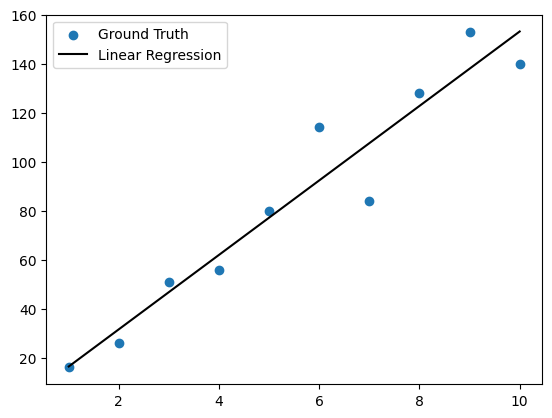

In [6]:
plt.scatter(x,y,label="Ground Truth") # Vamos a gráficar nuestros datos originales
plt.plot(x,lin_reg(x), color="black", label="Linear Regression") #Luego graficamos la curva ajustada

plt.legend()
plt.show()

Podemos ver que nuestra regresión es bastante cercana a los valores reales utilizados para ajustar la regresión. Nosotros podemos calcular la bondad de ajuste de nuestra regresión, mediante el análisis de los errores. El error se define como: $y_i - \hat{y_i}$ y corresponde a la resta del valor real $i$-ésimo, con el valor ajustado $i$-ésimo.

Mañana calcularemos el error, sin embargo se puede ajusta un polinomio a la muestra, veamos un ejemplo:

In [7]:
coefs = np.polyfit(x, y, 1) # polinomio de grado 1, recta
print("Coeficientes del polinomio:", coefs)
print(b0, b1)
print(beta_0, beta_1)

Coeficientes del polinomio: [15.2  1.2]
1.2000000000000028 15.2
1.2000000000000028 15.2


¿Un polinomio de grado mayor se ajustara mucho mejor?

In [8]:
coefs = np.polyfit(x, y, 2) # polinomio de grado 2, conica
print("Coeficientes del polinomio:", coefs)

Coeficientes del polinomio: [-0.30681818 18.575      -5.55      ]


Coeficiente cuadratico es pequeño, sin embargo la curva se ajusta mejor, aunque debemos medir las diferencias para decir que es mejor. Miren que curiosidad:

Coeficientes del polinomio: [ 1.01548721e-02 -4.86805555e-01  9.94634590e+00 -1.13158333e+02
  7.85862558e+02 -3.43440208e+03  9.37995078e+03 -1.53094528e+04
  1.34177302e+04 -4.72000000e+03]


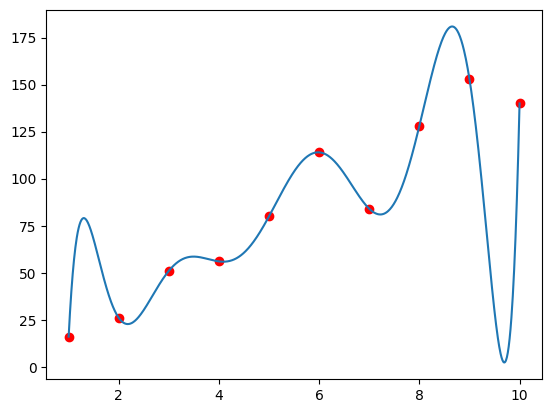

In [9]:
grado = 9
coefs = np.polyfit(x, y, grado)
print("Coeficientes del polinomio:", coefs)
xdet = np.linspace(1,10,1000)
ydet = []
for i in xdet:
    s = 0
    for j in range(len(coefs)):
        s += coefs[j]*i**(len(coefs)-1-j)
    ydet.append(s)
plt.scatter(x,y,color="red")
plt.plot(xdet, ydet)
plt.show()